In [26]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_202'
exps1 = glob(my_dir+'*')
d = exps1[0]
df1_ = load_results(d)

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_206'
exps2 = glob(my_dir+'*')
d = exps2[0]
df2_ = load_results(d)


my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_201'
exps3 = glob(my_dir+'*')
d = exps3[0]
df3_ = load_results(d)

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_190'
exps4 = glob(my_dir+'*')
d = exps4[0]
df4_ = load_results(d)

In [9]:



num_good_traj = 0

#1------------------------------------



df = df1_
df2 = pd.DataFrame() 
df['f']= df['l'].cumsum()/1000000

df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold
df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])
df2['mean_value'] = df['mean_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['max_value'] = df['max_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['min_value'] = df['min_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
time_limit = 0
fig = plt.figure(clear=True, figsize=(30,9))
roll =300
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax1 = plt.subplot(2, 4, 1)
df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', ax=ax1,legend=False)
ax1.set_xlabel('N. steps (M)')
ax1.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax1.grid(True)


ax5 = plt.subplot(2, 4, 5)
df2[['f_real','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','min_value', ax=ax5,legend=False)
df2[['f_real','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','max_value', ax=ax5,legend=False)
df2[['f_real','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','mean_value', ax=ax5,legend=False)
ax5.set_xlabel('N. steps (M)')
ax5.set_ylabel('Min Value')
#plt.xlim((0, xlim_))
ax5.grid(True)
ax5.set_title('One box easy', y=-0.1, pad=-25, verticalalignment="top")



#2------------------------------------


df = df2_
df2 = pd.DataFrame() 
df['f']= df['l'].cumsum()/1000000

df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold
df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])
df2['mean_value'] = df['mean_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['max_value'] = df['max_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['min_value'] = df['min_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
time_limit = 0

roll =300
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax2 = plt.subplot(2, 4, 2)
df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', ax=ax2,legend=False)
ax2.set_xlabel('N. steps (M)')
ax2.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax2.grid(True)


ax6 = plt.subplot(2, 4, 6)
df2[['f_real','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','min_value', ax=ax6,legend=False)
df2[['f_real','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','max_value', ax=ax6,legend=False)
df2[['f_real','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','mean_value', ax=ax6,legend=False)
ax6.set_xlabel('N. steps (M)')
ax6.set_ylabel('Value')
#plt.xlim((0, xlim_))
ax6.grid(True)


ax6.set_title('One box hard', y=-0.1, pad=-25, verticalalignment="top")

#3------------------------------------

df= df3_
df2 = pd.DataFrame() 
df['f']= df['l'].cumsum()/1000000

df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold
df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])
df2['mean_value'] = df['mean_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['max_value'] = df['max_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['min_value'] = df['min_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
time_limit = 0

roll =300
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax3 = plt.subplot(2, 4, 3)
df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', ax=ax3,legend=False)
ax3.set_xlabel('N. steps (M)')
ax3.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax3.grid(True)


ax7 = plt.subplot(2, 4, 7)
df2[['f_real','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','min_value', ax=ax7,legend=False)
df2[['f_real','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','max_value', ax=ax7,legend=False)
df2[['f_real','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','mean_value', ax=ax7,legend=False)
ax7.set_xlabel('N. steps (M)')
ax7.set_ylabel('Min Value')
#plt.xlim((0, xlim_))
ax7.grid(True)
ax7.title.set_text('First Plot')

ax7.set_title('Two boxes easy', y=-0.1, pad=-25, verticalalignment="top")


#4------------------------------------

df= df4_
df2 = pd.DataFrame() 
df['f']= df['l'].cumsum()/1000000

df['perf']= df['ereward']/(df['max_reward'])
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold
df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])
df2['mean_value'] = df['mean_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['max_value'] = df['max_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['min_value'] = df['min_value'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
time_limit = 0

roll =300
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax4 = plt.subplot(2, 4, 4)
df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', ax=ax4,legend='r')
ax4.set_xlabel('N. steps (M)')
ax4.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax4.grid(True)
ax4.legend(loc='lower right')


ax8 = plt.subplot(2, 4, 8)


df2[['f_real','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','min_value', ax=ax8,legend='min value')
df2[['f_real','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','max_value', ax=ax8,legend='max value')
df2[['f_real','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','mean_value', ax=ax8,legend='mean value')
ax8.set_xlabel('N. steps (M)')
ax8.set_ylabel('Value')
#plt.xlim((0, xlim_))
ax8.grid(True)
ax8.set_title('Two boxes hard', y=-0.1, pad=-25, verticalalignment="top")


KeyError: 'ereward'

<Figure size 720x2160 with 0 Axes>

In [5]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_202'
exps1 = glob(my_dir+'*')
d = exps1[0]
df1_ = load_results(d)
df_temp = pd.DataFrame() 
df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df1_['reward_woD']/(df1_['max_reward'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))])
df1_ = df_temp

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_203'
exps2 = glob(my_dir+'*')
d = exps2[0]
df2_ = load_results(d)
df_temp = pd.DataFrame() 

df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df2_['reward_woD']/(df2_['max_reward'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))])
df2_ = df_temp


my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_204'
exps3 = glob(my_dir+'*')
d = exps3[0]
df3_ = load_results(d)
df_temp = pd.DataFrame() 
df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df3_['reward_woD']/(df3_['max_reward'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))])
df3_ = df_temp

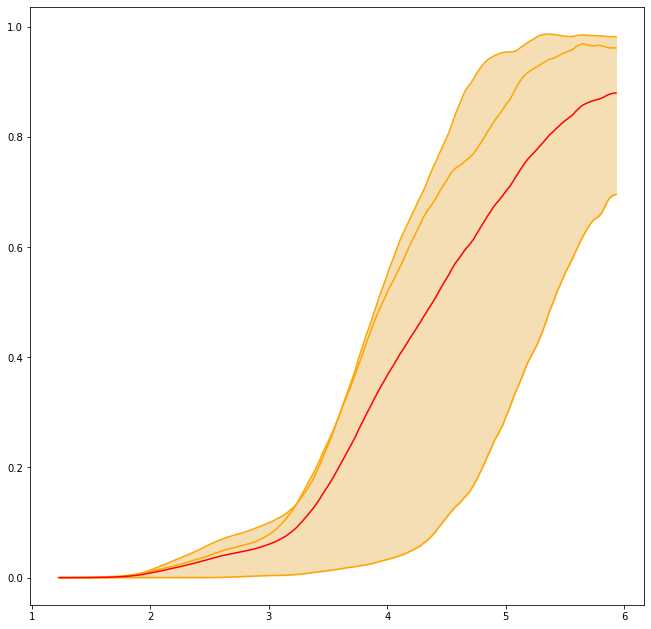

In [7]:
from scipy.interpolate import interp1d
roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3

fig = plt.figure(clear=True, figsize=(11,11))
ax_ = fig.gca()


roll_2 = 1000
ax_.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax_.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax_.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax_.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax_.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax_.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
#plt.xlim((max(df1_['f'].rolling(roll).mean().iloc[roll-1],df3_['f'].rolling(roll).mean().iloc[roll-1]), min(df1_['f'].rolling(roll).mean().iloc[-1],df3_['f'].rolling(roll).mean().iloc[-1])))

In [ ]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_202'
exps1 = glob(my_dir+'*')
d = exps1[0]
df1_ = load_results(d)
df_temp = pd.DataFrame() 
df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df1_['reward_woD']/(df1_['max_reward'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))])
df1_ = df_temp

my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_203'
exps2 = glob(my_dir+'*')
d = exps2[0]
df2_ = load_results(d)
df_temp = pd.DataFrame() 

df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df2_['reward_woD']/(df2_['max_reward'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))])
df2_ = df_temp


my_dir = '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_204'
exps3 = glob(my_dir+'*')
d = exps3[0]
df3_ = load_results(d)
df_temp = pd.DataFrame() 
df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
df_temp['f']= df_temp['l'].cumsum()/1000000
df_temp['r']= df3_['reward_woD']/(df3_['max_reward'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))])
df3_ = df_temp

In [36]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from scipy.interpolate import interp1d


def plot_subplot(dirs, bc_dir, position, title, legend = False ):
    
   
    df1_ = dirs[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df1_['reward_woD']/(df1_['max_reward'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))])
    df1_ = df_temp

    df2_ = dirs[1]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df2_['reward_woD']/(df2_['max_reward'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))])
    df2_ = df_temp

    df3_ = dirs[2]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df3_['reward_woD']/(df3_['max_reward'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))])
    df3_ = df_temp
    
    df5_ = bc_dir[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df5_['l'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df5_['reward_woD']/(df5_['max_reward'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))])
    df5_ = df_temp
    
    
    df6_ = bc_dir[1]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df6_['l'][~((df6_['ereward'] != 0) & (df6_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df6_['reward_woD']/(df6_['max_reward'][~((df6_['ereward'] != 0) & (df6_['reward_woD'] == 0))])
    df6_ = df_temp
    
    roll = 1000
    df4_ = pd.DataFrame() 
    #df4_= pd.concat([df1_, df2_, df3_])
    df4_ = df1_.merge(df3_,  how = 'outer')
    df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
    df4_ = df4_.sort_values(by=['f'])
    df4_ = df4_.reset_index(drop=True)
    df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]

    f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
    df4_['r1'] = f1(df4_['f'])
    f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
    df4_['r2'] = f2(df4_['f'])
    f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
    df4_['r3'] = f3(df4_['f'])
    df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3
    
    
    df4_['BC_100'] = df5_['r'].sum()/df5_['l'].count()
    print(df4_['BC_100'][10], "BC performance")
    
    df4_['BC_10'] = df6_['r'].sum()/df6_['l'].count()
    print(df4_['BC_100'][10], "BC performance")
    

    ax1 = plt.subplot(1, 4, position)


    roll_2 = 1000
    ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'blue', label= r'$\rho$ = 0.1, $\phi$ = 0.3')
    ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'blue')
    ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'blue')
    ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'blue', linewidth=5.0, label= r'$\rho$ = 0.1, $\phi$ = 0.3 mean')
    ax1.plot(df4_['f'],df4_['BC_100'].rolling(roll_2).mean(), 'green', label= "behavioral cloning 100")
    ax1.plot(df4_['f'],df4_['BC_10'].rolling(roll_2).mean(), 'lime', label= "behavioral cloning 10")
    #ax1.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
    #ax1.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
    ax1.set_xlabel('N. steps (M)', fontsize=20)
    ax1.set_ylabel('Success rate', fontsize=20)

    ax1.set_title(title, y=-0.1, pad=-25, verticalalignment="top", fontsize=22)
    #ax1.set_title(title)
    if legend:
        ax1.legend(loc=2, prop={'size': 12})
        

    ax1.grid(True)
    

def plot_subplot_2(dirs, bc_dir, position, title, legend =  False):
    
    df1 = dirs[0]
    df2 = dirs[1]

    df = pd.concat([df1,df2])

    #fig = plt.figure(clear=True, figsize=(11,11))

    df2 = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000


    df['perf']= df['ereward']/(df['max_reward'])
    df['perf'].where(df['perf']>0,0,inplace=True)
    df['goal'] = df['perf']>0.9  #guess a threadshold

    df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
    df2['f_real']= df2['len_real'].cumsum()/1000000
    df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
    df2['real_perf']= df2['reward_woD']/(df['max_reward'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))])
    
    df5_ =  bc_dir[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df5_['l'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df5_['reward_woD']/(df5_['max_reward'][~((df5_['ereward'] != 0) & (df5_['reward_woD'] == 0))])
    df5_ = df_temp
    df2['BC_100'] = df5_['r'].sum()/df5_['l'].count()
    print(df2['BC_100'][100], "BC performance")
    
    df6_ =  bc_dir[1]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df6_['l'][~((df6_['ereward'] != 0) & (df6_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df6_['reward_woD']/(df6_['max_reward'][~((df6_['ereward'] != 0) & (df6_['reward_woD'] == 0))])
    df5_ = df_temp
    df2['BC_10'] = df6_['r'].sum()/df6_['l'].count()
    
    print(df2['BC_10'][100], "BC performance")

    ax1 = plt.subplot(1, 4, position)

    roll = 1000
    #df2[['f_real','real_perf']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','real_perf', color='r', ax=ax1,legend=False)
    ax1.plot(df2['f_real'],df2['real_perf'].rolling(roll).mean(), 'blue', label= r'$\rho$ = 0.1, $\phi$ = 0.3')
    ax1.plot(df2['f_real'],df2['BC_100'].rolling(roll).mean(), 'green', label= "behavioral cloning 100")
    ax1.plot(df2['f_real'],df2['BC_10'].rolling(roll).mean(), 'lime', label= "behavioral cloning 10")
    ax1.set_xlabel('N. steps (M)', fontsize=20)
    ax1.set_ylabel('Success rate ', fontsize=20)
    if legend:
        ax1.legend(loc=2, prop={'size': 12})

    ax1.set_title(title, y=-0.1, pad=-25, verticalalignment="top", fontsize=22)

    ax1.grid(True)

In [37]:
dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_223',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_222',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_218']
dfs_1 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_1.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_241_performance_2']

dfs_1_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_1_bc.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_207',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_212',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_213']

dfs_2 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_2.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_243_performance_2']
dfs_2_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_2_bc.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_201',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_205',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_206']
dfs_3 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_3.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_242_performance_2']    
dfs_3_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_3_bc.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_184',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_190']

dfs_4 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_4.append(load_results(d))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_240_performance_2']
dfs_4_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_4_bc.append(load_results(d))




In [38]:


dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_241_performance_2', \
       '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_226_performance']

dfs_1_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_1_bc.append(load_results(d))


dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_243_performance_2',\
       '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_229_performance']
dfs_2_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_2_bc.append(load_results(d))



dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_242_performance_2',\
       '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_227_performance']    
dfs_3_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_3_bc.append(load_results(d))



dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_240_performance_2',
       '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_228_performance']
dfs_4_bc = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs_4_bc.append(load_results(d))




0.05389310081840747 BC performance
0.05389310081840747 BC performance
0.00399555463636152 BC performance
0.00399555463636152 BC performance
0.0024876208157067134 BC performance
0.0024876208157067134 BC performance
100    0.008956
100    0.008956
Name: BC_100, dtype: float64 BC performance
100    0.0
100    0.0
Name: BC_10, dtype: float64 BC performance


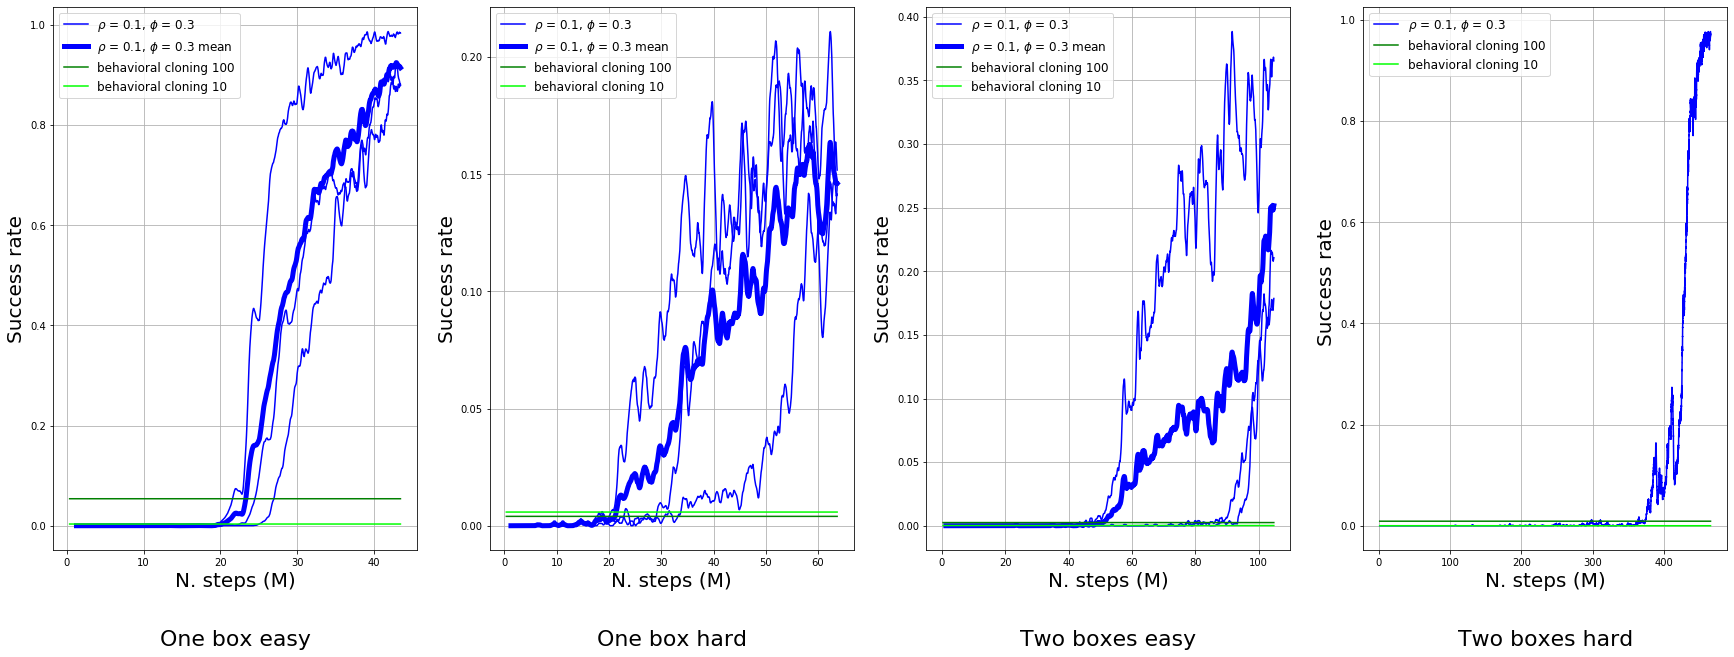

In [39]:

fig = plt.figure(clear=True, figsize=(30,10))

plot_subplot(dfs_1, dfs_1_bc, 1, 'One box easy', True)

plot_subplot(dfs_2, dfs_2_bc, 2, 'One box hard', True)

plot_subplot(dfs_3, dfs_3_bc, 3, 'Two boxes easy', True)

plot_subplot_2(dfs_4, dfs_4_bc, 4, 'Two boxes hard', True)

In [1]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from scipy.interpolate import interp1d



def plot_subplot(dirs, position, title, color, labels, xlim):
    

    df1_ = dirs[0]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df1_['l'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df1_['reward_woD']/(df1_['max_reward'][~((df1_['ereward'] != 0) & (df1_['reward_woD'] == 0))])
    df1_ = df_temp


    
    df2_ = dirs[1]
    df_temp = pd.DataFrame() 

    df_temp['l'] = df2_['l'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df2_['reward_woD']/(df2_['max_reward'][~((df2_['ereward'] != 0) & (df2_['reward_woD'] == 0))])
    df2_ = df_temp


    
    df3_ = dirs[2]
    df_temp = pd.DataFrame() 
    df_temp['l'] = df3_['l'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))] 
    df_temp['f']= df_temp['l'].cumsum()/1000000
    df_temp['r']= df3_['reward_woD']/(df3_['max_reward'][~((df3_['ereward'] != 0) & (df3_['reward_woD'] == 0))])
    df3_ = df_temp
    
    
    roll = 1000
    df4_ = pd.DataFrame() 
    #df4_= pd.concat([df1_, df2_, df3_])
    df4_ = df1_.merge(df3_,  how = 'outer')
    df4_ = df4_.merge(df2_,  how = 'outer') 
    df4_ = df4_.sort_values(by=['f'])
    df4_ = df4_.reset_index(drop=True)
    df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
    df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
   
    f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
    df4_['r1'] = f1(df4_['f'].astype(float))
    f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
    df4_['r2'] = f2(df4_['f'].astype(float))
    f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
    df4_['r3'] = f3(df4_['f'].astype(float))
    df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3
    df4_ = df4_.where(df4_['f']<=xlim)
    
    ax1 = plt.subplot(1, 2, position)

    roll_2 = 1000
    ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), color)
    if len(labels)>0:
        ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), color,label =  labels[0])
        ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), color, linewidth=5.0, label = labels[0] + " mean" )
    else:
        ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), color)
        ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), color, linewidth=5.0 )
    
    ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),color)
    
    ax1.set_xlabel('N. steps (M)', fontsize=20)
    ax1.set_ylabel('Success rate', fontsize=20)
    if len(labels)>0:
        ax1.legend(loc=6, prop={'size': 12})
    
    #plt.xlim((0, xlim))
    ax1.set_title(title, y=-0.1, pad=-25, verticalalignment="top", fontsize=22)
    #ax1.set_title(title)

    ax1.grid(True)

    





In [2]:

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_219',\
    '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_220']

dfs1 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs1.append(load_results(d))
    
dir_double = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_217',\
    '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_221']

my_dir = dir_double[0]
exps1 = glob(my_dir+'*')
d = exps1[0]
df1 =  load_results(d)

my_dir = dir_double[1]
exps1 = glob(my_dir+'*')
d = exps1[0]
df2 =  load_results(d)

dfs1.append(pd.concat([df1,df2], ignore_index=True))
            
            
dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_201',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_205',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_206']    
    
dfs2 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs2.append(load_results(d))

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


In [3]:
dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_233',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_234',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_235']    
    
dfs3 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs3.append(load_results(d))
    
dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_218',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_222',\
        '/workspace7/Unity3D/gabriele/Animal-AI/animal-ppo-value/RUNS/exp_reason_223']    
    
dfs4 = []
for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs4.append(load_results(d))

In [4]:
dir_double = ['/workspace7/Unity3D/gabriele/Animal-AI/nappo/RUNS/exp_reason_236',\
        '/workspace7/Unity3D/gabriele/Animal-AI/nappo/RUNS/exp_reason_238']    
 
dfs5 = []    
my_dir = dir_double[0]
exps1 = glob(my_dir+'*')
d = exps1[0]
df1 =  load_results(d)

my_dir = dir_double[1]
exps1 = glob(my_dir+'*')
d = exps1[0]
df2 =  load_results(d)

dfs5.append(pd.concat([df1,df2], ignore_index=True))

dirs = ['/workspace7/Unity3D/gabriele/Animal-AI/nappo/RUNS/exp_reason_237',\
        '/workspace7/Unity3D/gabriele/Animal-AI/nappo/RUNS/exp_reason_239']    


for ii in range(len(dirs)):
    my_dir = dirs[ii]
    exps1 = glob(my_dir+'*')
    d = exps1[0]
    dfs5.append(load_results(d))

/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


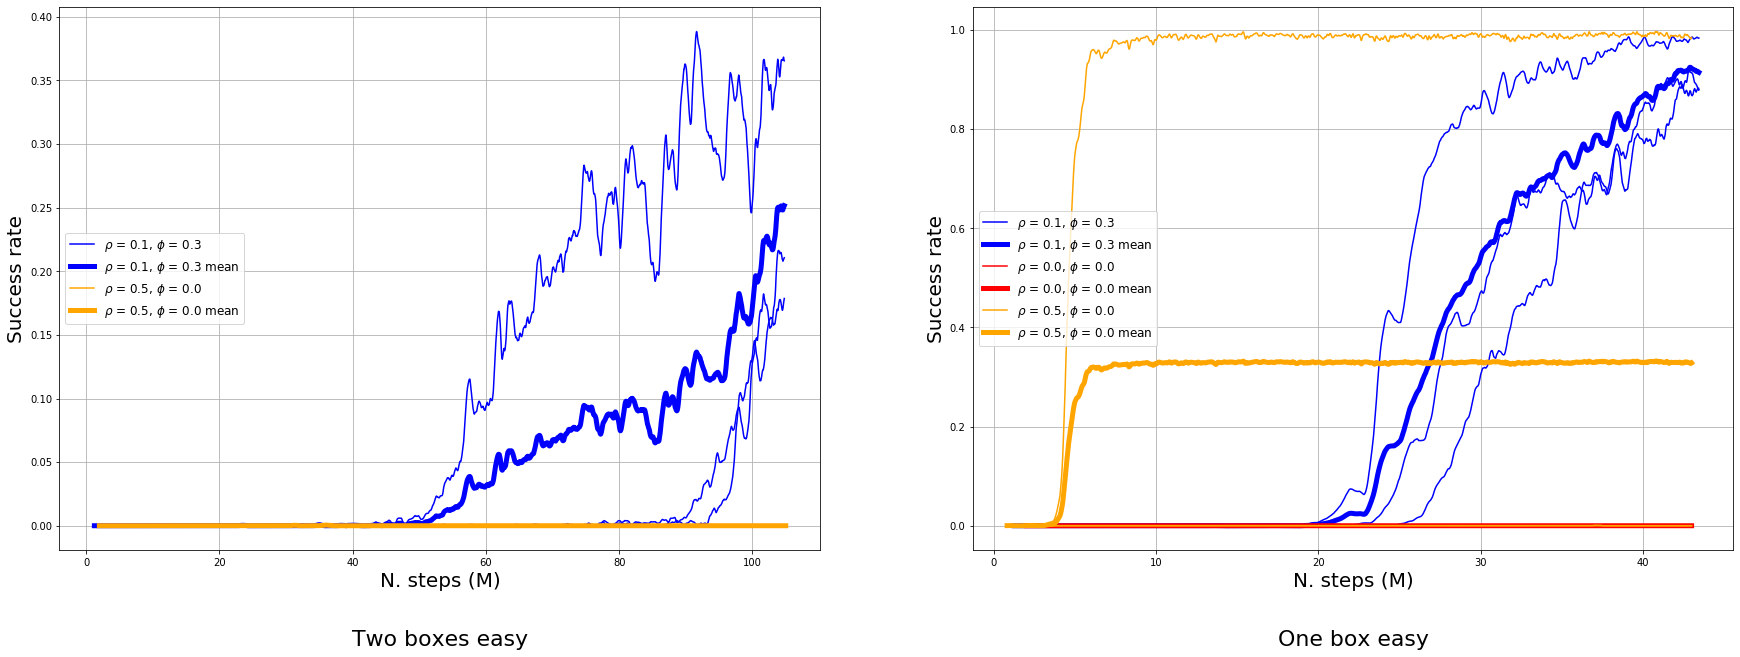

In [5]:
fig = plt.figure(clear=True, figsize=(30,10))    
plot_subplot(dfs2, 1, '', 'blue', [r'$\rho$ = 0.1, $\phi$ = 0.3'],105)
plot_subplot(dfs1, 1, 'Two boxes easy', 'orange', [r'$\rho$ = 0.5, $\phi$ = 0.0'], 105)
plot_subplot(dfs4, 2, '', 'blue', [r'$\rho$ = 0.1, $\phi$ = 0.3'], 46)
plot_subplot(dfs3, 2, '', 'red', [r'$\rho$ = 0.0, $\phi$ = 0.0'],43)
plot_subplot(dfs5, 2, 'One box easy', 'orange', [r'$\rho$ = 0.5, $\phi$ = 0.0'],43)

In [145]:
from scipy.interpolate import interp1d

fig = plt.figure(clear=True, figsize=(30,10))

#1------------------------------------



roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]

f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3


ax1 = plt.subplot(1, 4, 1)


roll_2 = 1000
ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax1.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax1.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax1.set_xlabel('N. steps (M)')
ax1.set_ylabel('Performance without Deomnstrations')

ax1.set_title('One box easy', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax1.grid(True)




#2------------------------------------


roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3

ax2 = plt.subplot(1, 4, 2)

roll_2 = 1000
ax2.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax2.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax2.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax2.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax2.set_xlabel('N. steps (M)')
ax2.set_ylabel('Performance without Deomnstrations')

ax2.set_title('One box hard', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax2.grid(True)



#3------------------------------------

roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3



ax3 = plt.subplot(1, 4, 3)
roll_2 = 1000
ax3.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax3.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax3.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax3.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax3.set_xlabel('N. steps (M)')
ax3.set_ylabel('Performance without Deomnstrations')

ax3.set_title('Two boxes easy', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax3.grid(True)




#4------------------------------------

roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3



ax4 = plt.subplot(1, 4, 4)
roll_2 = 1000
ax4.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax4.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax4.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax4.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax4.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax4.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax4.set_xlabel('N. steps (M)')
ax4.set_ylabel('Performance without Deomnstrations')

ax4.set_title('Two boxes hard', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax4.grid(True)


NameError: name 'df1_' is not defined

<Figure size 2160x720 with 0 Axes>

In [2]:
from scipy.interpolate import interp1d


fig = plt.figure(clear=True, figsize=(30,10))

num_good_traj = 0

#1------------------------------------



roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3


ax1 = plt.subplot(1, 4, 1)


roll_2 = 1000
ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax1.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax1.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax1.set_xlabel('N. steps (M)')
ax1.set_ylabel('Performance without Deomnstrations')

ax1.set_title('Self-imitation ', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax1.grid(True)




#2------------------------------------


roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3

ax2 = plt.subplot(1, 4, 2)

roll_2 = 1000
ax2.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax2.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax2.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax2.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax2.set_xlabel('N. steps (M)')
ax2.set_ylabel('Performance without Deomnstrations')

ax2.set_title('PPO + D', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax2.grid(True)



#3------------------------------------

roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3



ax3 = plt.subplot(1, 4, 3)
roll_2 = 1000
ax3.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax3.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax3.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax3.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax3.set_xlabel('N. steps (M)')
ax3.set_ylabel('Performance without Deomnstrations')

ax3.set_title(' Vanilla PPO', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax3.grid(True)


NameError: name 'df1_' is not defined

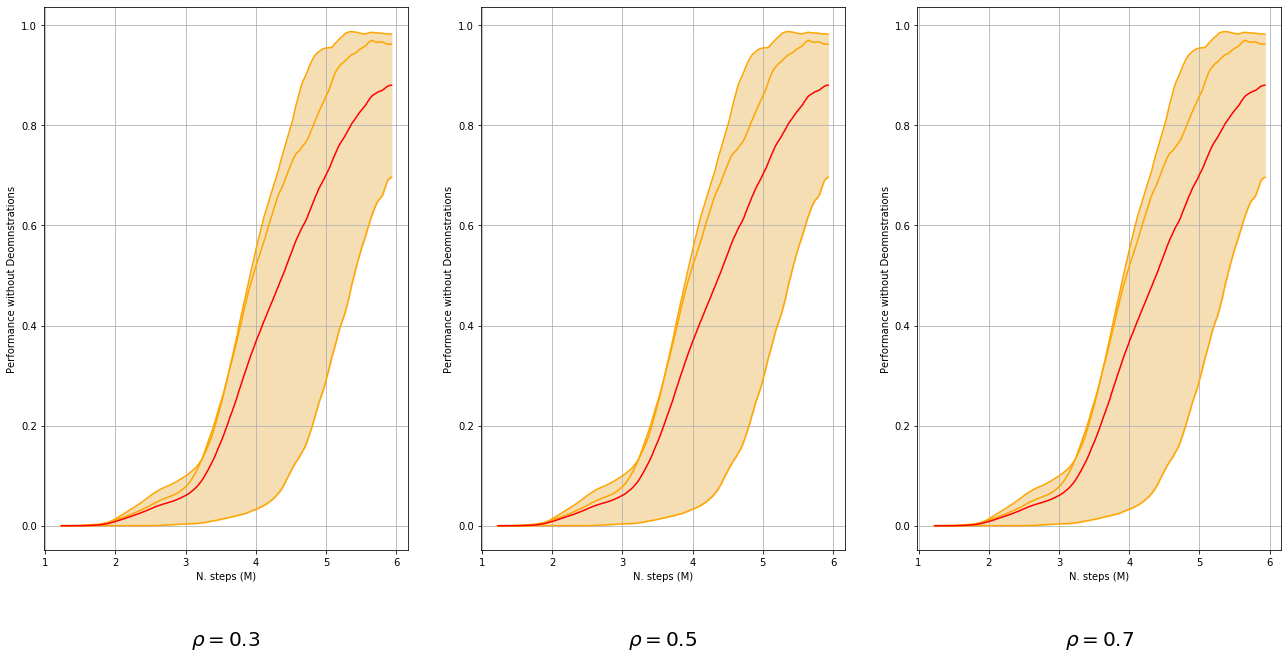

In [25]:
from scipy.interpolate import interp1d

fig = plt.figure(clear=True, figsize=(30,10))

num_good_traj = 0

#1------------------------------------



roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3


ax1 = plt.subplot(1, 4, 1)


roll_2 = 1000
ax1.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax1.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax1.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax1.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax1.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax1.set_xlabel('N. steps (M)')
ax1.set_ylabel('Performance without Deomnstrations')

ax1.set_title(r'$\rho = 0.3$', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax1.grid(True)




#2------------------------------------


roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3

ax2 = plt.subplot(1, 4, 2)

roll_2 = 1000
ax2.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax2.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax2.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax2.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax2.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax2.set_xlabel('N. steps (M)')
ax2.set_ylabel('Performance without Deomnstrations')

ax2.set_title(r'$\rho = 0.5$', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax2.grid(True)



#3------------------------------------

roll = 1000
df4_ = pd.DataFrame() 
#df4_= pd.concat([df1_, df2_, df3_])
df4_ = df1_.merge(df3_,  how = 'outer')
df4_ = df4_.merge(df2_,  how = 'outer') # roughness how it changes with roll seems very weird
df4_ = df4_.sort_values(by=['f'])
df4_ = df4_.reset_index(drop=True)
df4_ = df4_[(df4_['f'] > df1_['f'].iloc[0] )&(df1_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df2_['f'].iloc[0] )&(df2_['f'].iloc[-1] > df4_['f'])]
df4_ = df4_[(df4_['f'] > df3_['f'].iloc[0] )&(df3_['f'].iloc[-1] > df4_['f'])]
f1 = interp1d(df1_['f'], df1_['r'].rolling(roll).mean())
df4_['r1'] = f1(df4_['f'])
f2 = interp1d(df2_['f'], df2_['r'].rolling(roll).mean())
df4_['r2'] = f2(df4_['f'])
f3 = interp1d(df3_['f'], df3_['r'].rolling(roll).mean())
df4_['r3'] = f3(df4_['f'])
df4_['r_mean'] = (df4_['r3'] + df4_['r2'] + df4_['r1'])/3



ax3 = plt.subplot(1, 4, 3)
roll_2 = 1000
ax3.plot(df4_['f'],df4_['r3'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r1'].rolling(roll_2).mean(), 'orange')
ax3.plot(df4_['f'],df4_['r2'].rolling(roll_2).mean(),'orange')
ax3.plot(df4_['f'],df4_['r_mean'].rolling(roll_2).mean(), 'r')
ax3.fill_between(df4_['f'], df4_['r3'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat' )
ax3.fill_between(df4_['f'], df4_['r1'].rolling(roll_2).mean(), df4_['r2'].rolling(roll_2).mean(), color = 'wheat')
ax3.set_xlabel('N. steps (M)')
ax3.set_ylabel('Performance without Deomnstrations')

ax3.set_title(r'$\rho = 0.7$', y=-0.1, pad=-25, verticalalignment="top", fontsize=20)

ax3.grid(True)


In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('../../doc/_static/stinkbug.png')
imgplot = plt.imshow(img)